In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import math 

data = pd.read_csv("malaria.csv")
data.head(10)

,recurrent fever,chills,sweating,vomiting,pallor,headache,abdomen pain,fatigue,weight loss,breathlessness,oedema,malaria
0,65,0,75,20,47,10,35,0,0,0,0,1
1,70,0,56,0,59,2,35,0,10,10,20,1
2,45,46,23,0,0,3,0,36,0,0,0,0
3,0,13,14,0,14,13,0,0,0,10,35,0
4,10,12,10,10,13,34,0,0,15,13,15,0
5,43,0,55,85,67,45,67,0,0,0,0,1
6,63,0,77,68,32,44,45,0,33,0,0,1
7,48,13,68,58,14,14,34,0,0,0,32,1
8,0,45,12,0,32,0,73,0,0,0,0,0
9,46,0,34,58,30,60,55,0,0,0,0,1


In [7]:
print("Numbers of patients in the dataset :", str(len(data.index)))

Numbers of patients in the dataset : 775


# Analyzing Data

In [2]:
data.isnull().sum()

recurrent fever    0
chills             0
sweating           0
vomiting           0
pallor             0
headache           0
abdomen pain       0
fatigue            0
weight loss        0
breathlessness     0
oedema             0
malaria            0
dtype: int64

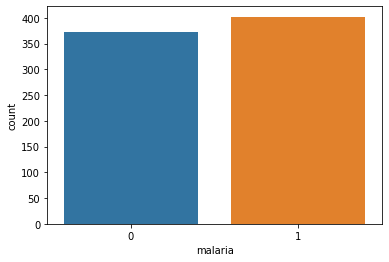

In [3]:
sns.countplot(x="malaria", data = data)

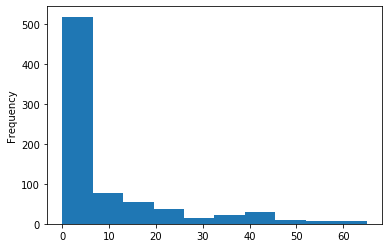

In [9]:
data["chills"].plot.hist()

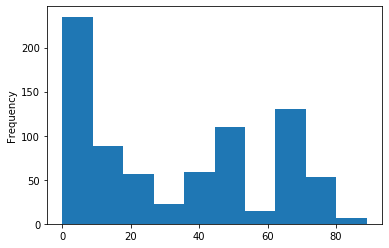

In [11]:
data["recurrent fever"].plot.hist()

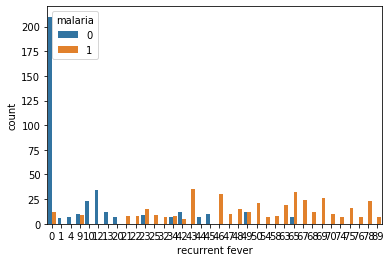

In [13]:
sns.countplot(x="recurrent fever", hue="malaria", data = data)

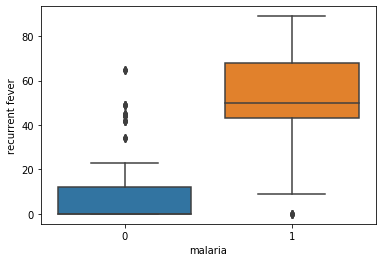

In [15]:
sns.boxplot(x="malaria", y = "recurrent fever", data = data)

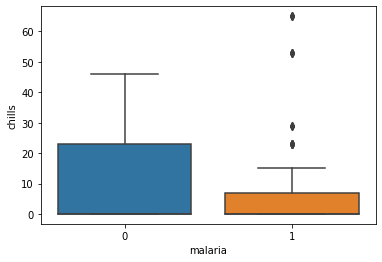

In [16]:
sns.boxplot(x = "malaria", y = "chills", data = data)

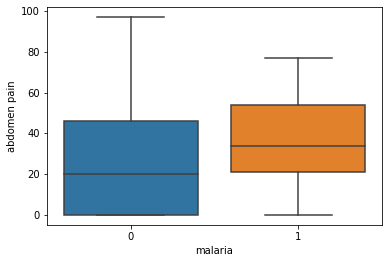

In [18]:
sns.boxplot(x = "malaria", y = "abdomen pain", data = data)

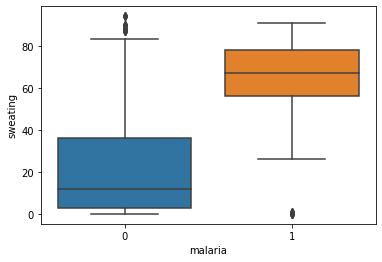

In [19]:
sns.boxplot(x = "malaria", y = "sweating", data = data)

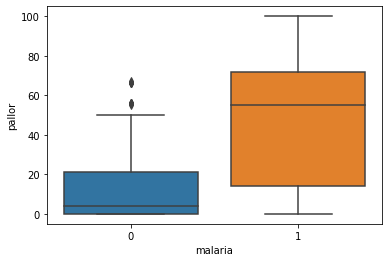

In [3]:
sns.boxplot(x = "malaria", y = "pallor", data = data)

In [20]:
#this proves sweating, pallor and recurrent fever are major factors in malaria 

In [30]:
X = data.drop("malaria", axis=1)
y = data["malaria"]

In [31]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state = 0)

In [49]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred )

E:\python\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([[102,   8],
       [  5, 118]], dtype=int64)

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100

94.4206008583691

In [73]:

new_data = pd.DataFrame({'recurrent fever':[65],'chills':[90],'sweating':[60],'vomiting':[80],'pallor':[0],'headache':[0],'abdomen pain':[5],'fatigue':[60],'weight loss':[6],'breathlessness':[0],'oedema':[20]})
new_data = new_data[['recurrent fever','chills','sweating','vomiting','pallor','headache','abdomen pain','fatigue','weight loss','breathlessness','oedema']]                         
new_data

,recurrent fever,chills,sweating,vomiting,pallor,headache,abdomen pain,fatigue,weight loss,breathlessness,oedema
0,65,90,60,80,0,0,5,60,6,0,20


In [74]:
y_pred=model.predict(new_data)
print(y_pred)

[0]
